C:\Users\Lucas\AppData\Local\Temp\ipykernel_10720\3741865547.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(
C:\Users\Lucas\AppData\Local\Temp\ipykernel_10720\3741865547.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Minuto'] = df_filtered['Timestamp'].dt.floor('min')


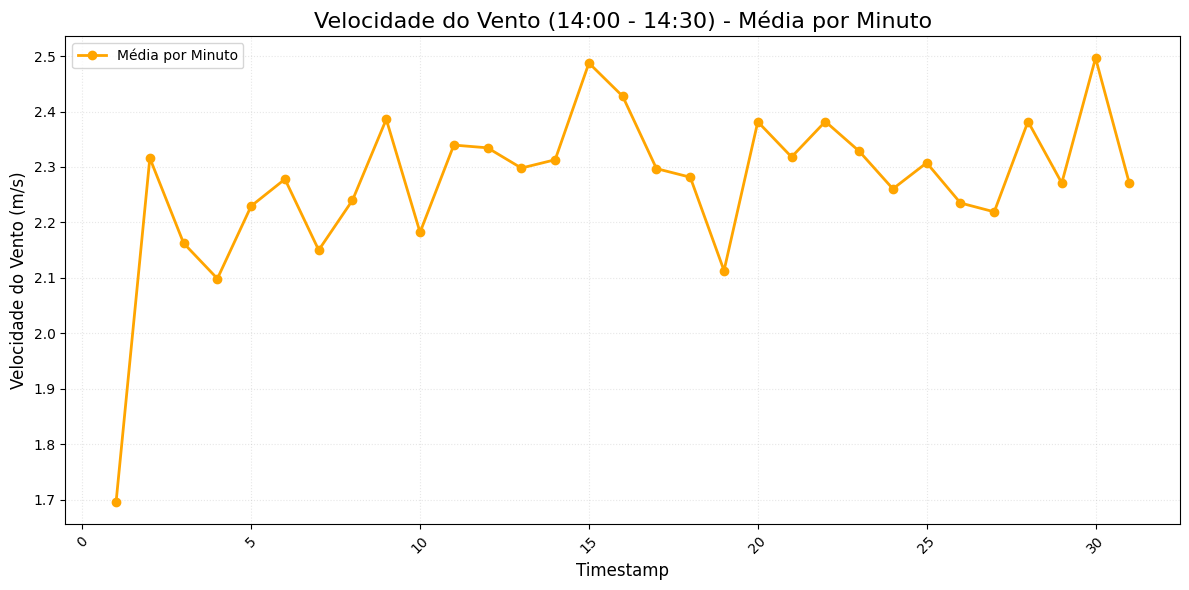

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import time
import numpy as np

# Carregar o arquivo CSV
try:
    df = pd.read_csv(
        'C:/Users/Lucas/Documents/WSPLV1_04_06_2025.csv',
        sep=';',
        parse_dates=['Timestamp'],
        decimal=',',
        encoding='utf-8'
    )
    
    # Verificar colunas necessárias
    if 'WindSpeed [m/s]' not in df.columns:
        print("\033[1;31mErro: Coluna 'WindSpeed [m/s]' não encontrada.\033[m")
        print(f"Colunas disponíveis: {list(df.columns)}")
        exit()

    # CONVERSÃO CRÍTICA: Garantir que os dados são numéricos
    # Substituir vírgulas por pontos e converter para float
    df['WindSpeed [m/s]'] = df['WindSpeed [m/s]'].astype(str).str.replace(',', '.').astype(float)
    
except FileNotFoundError:
    print("\033[1;31mErro: Arquivo não encontrado. Verifique o nome/path.\033[m")
    exit()
except Exception as e:
    print(f"\033[1;31mErro inesperado: {str(e)}\033[m")
    exit()

# Filtrar dados entre 14:00 e 14:30
df_filtered = df[
    (df['Timestamp'].dt.time >= time(14, 0)) & 
    (df['Timestamp'].dt.time <= time(14, 30))
]

if df_filtered.empty:
    print("\033[1;31mErro: Nenhum dado encontrado entre 14:00 e 14:30.\033[m")
    exit()

# Verificar se temos dados numéricos
# print("\n\033[1mVerificação de tipos:\033[0m")
# print(df_filtered[['WindSpeed [m/s]']].info())

# Calcular média por minuto - MÉTODO ALTERNATIVO
# Criar coluna com minuto arredondado
df_filtered['Minuto'] = df_filtered['Timestamp'].dt.floor('min')

# Agrupar por minuto e calcular média
df_avg = df_filtered.groupby('Minuto', as_index=False).agg({
    'WindSpeed [m/s]': 'mean'
}).rename(columns={'Minuto': 'Timestamp'})

df_avg['MinuteIndex'] = range(1, len(df_avg) + 1)

del df_filtered
del df

# Configurar gráfico
plt.figure(figsize=(12, 6))

# Plotar médias por minuto
plt.plot(df_avg['MinuteIndex'], 
        df_avg['WindSpeed [m/s]'], 
        color='orange',
        linewidth=2,
        marker='o',
        label='Média por Minuto')


# Formatação do gráfico
plt.title('Velocidade do Vento (14:00 - 14:30) - Média por Minuto', fontsize=16)
plt.xlabel('Timestamp', fontsize=12)
plt.ylabel('Velocidade do Vento (m/s)', fontsize=12)
plt.grid(alpha=0.3, linestyle=':')
plt.xticks(rotation=45)

# Formatar eixo X para mostrar minutos
# plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))


plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Lucas\AppData\Local\Temp\ipykernel_10720\3694048615.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df1 = pd.read_csv("C:/Users/Lucas/Documents/20867257_3.txt", sep=';', parse_dates=['Data Hora, GMT-03:00'],
C:\Users\Lucas\AppData\Local\Temp\ipykernel_10720\3694048615.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['MinuteIndex'] = range(1, len(df_filtered1) + 1)


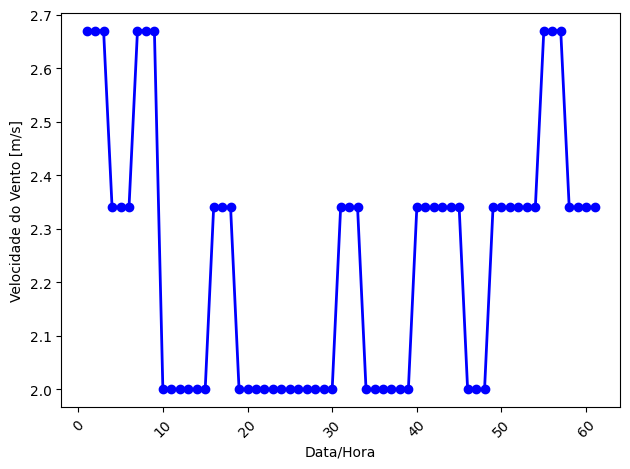

In [70]:

# Função de parsing personalizado
def parse_custom_datetime(dt_str):
    return pd.to_datetime(dt_str, format='%d/%m/%y %Hh%Mmin%Ss')

# Carregar os dados
df1 = pd.read_csv("C:/Users/Lucas/Documents/20867257_3.txt", sep=';', parse_dates=['Data Hora, GMT-03:00'],
    date_parser=parse_custom_datetime, decimal='.', encoding='utf-8')

# Aplicar fuso horário
# df['Data Hora, GMT-03:00'] = df['Data Hora, GMT-03:00'].dt.tz_localize('GMT-03:00')
df_filtered1 = df1[(df1['Data Hora, GMT-03:00'].dt.time >= time(3, 22)) &
                   (df1['Data Hora, GMT-03:00'].dt.time <= time(3, 23))]

# Configurar índice para plotagem
df_filtered1.set_index('Data Hora, GMT-03:00', inplace=True)

# display(df_filtered1.index)

df_filtered1['MinuteIndex'] = range(1, len(df_filtered1) + 1)

# Plotar
plt.plot(df_filtered1['MinuteIndex'], 
        df_filtered1['Velocidade do Vento, m/s (LGR S/N: 20867257, SEN S/N: 21922151)'], 
        color='blue',
        linewidth=2,
        marker='o',
        label='Média por Minuto')


plt.xlabel('Data/Hora')
plt.ylabel('Velocidade do Vento [m/s]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

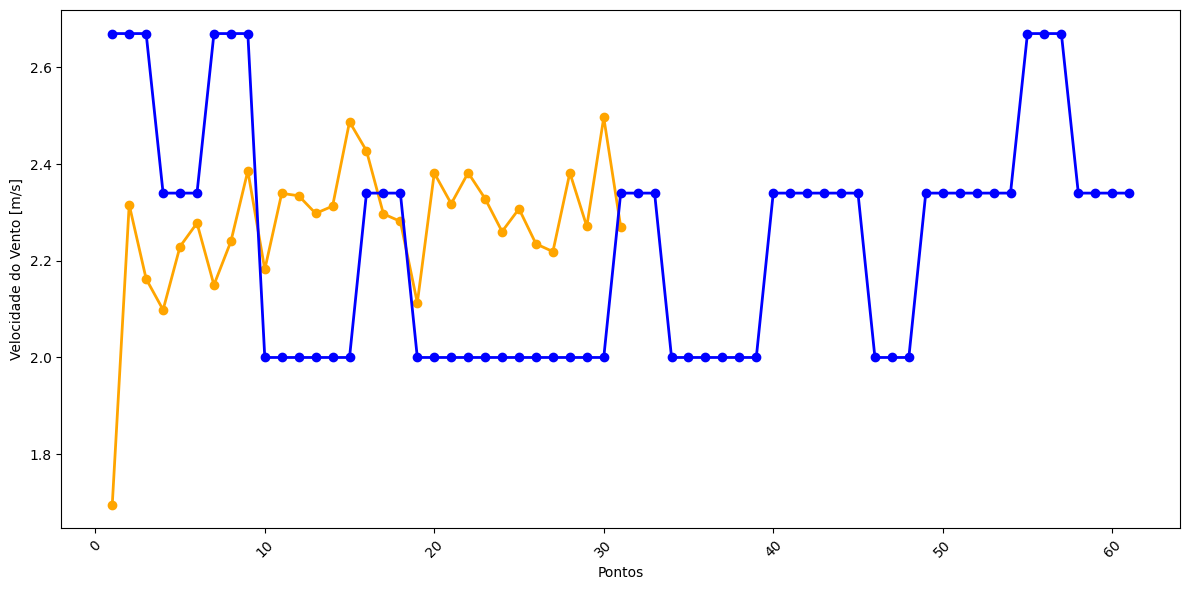

In [71]:
# Configurar gráfico
plt.figure(figsize=(12, 6))

# Plotar médias por minuto
plt.plot(df_avg['MinuteIndex'], 
        df_avg['WindSpeed [m/s]'], 
        color='orange',
        linewidth=2,
        marker='o',
        label='Média por Minuto')

plt.plot(df_filtered1['MinuteIndex'], 
        df_filtered1['Velocidade do Vento, m/s (LGR S/N: 20867257, SEN S/N: 21922151)'], 
        color='blue',
        linewidth=2,
        marker='o',
        label='Média por Minuto')

plt.xlabel('Pontos')
plt.ylabel('Velocidade do Vento [m/s]')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()